# Credit Scoring Machine Learning Project

# Importing Libraries

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score


# Load and explore 

In [60]:
data = pd.read_csv("Bank_of_America_data.csv")
data_copy1 = data.copy(deep=True)
data_copy2 = data.copy(deep=True)

In [61]:
data.shape

(5960, 13)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [63]:
data.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [64]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [65]:
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [66]:
data.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


* Missing Values

In [67]:
# Function to calculate the number and the percentage of the missing values by column
def missing_values_table(df):
    
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(4)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [68]:
missing_values_table(data)

Your selected dataframe has 13 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values
DEBTINC,1267,21.2584
DEROG,708,11.8792
DELINQ,580,9.7315
MORTDUE,518,8.6913
YOJ,515,8.6409
NINQ,510,8.5570
CLAGE,308,5.1678
JOB,279,4.6812
REASON,252,4.2282
CLNO,222,3.7248


In [69]:
# number of clients that have 0 & 1 as BAD
pd.Series(data["BAD"]).value_counts()

0    4771
1    1189
Name: BAD, dtype: int64

In [70]:
print("Percentage of clients that defaulted (BAD = 1) = ",round((1189/5960)*100,3),"%")

Percentage of clients that defaulted (BAD = 1) =  19.95 %


The data is __umbalanced__ : only __20%__ of the clients __defaulted__ their loan payments.

#### - Target distribution

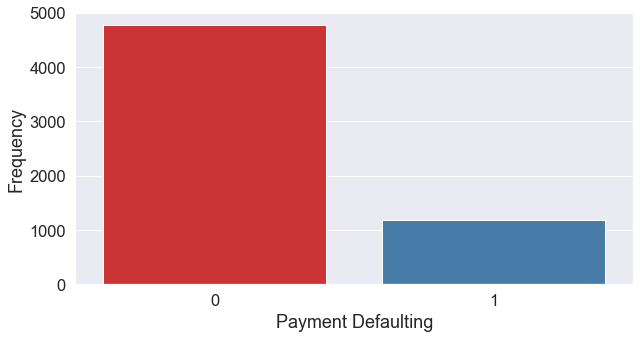

In [71]:
ax = sns.countplot(x = data.BAD ,palette="Set1")
sns.set(font_scale=1.5)
ax.set_ylim(top = 5000)
ax.set_xlabel('Payment Defaulting')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=5000)

plt.show()

The distribution of the target variable ("BAD") is very skewed.

### Detecting outliers

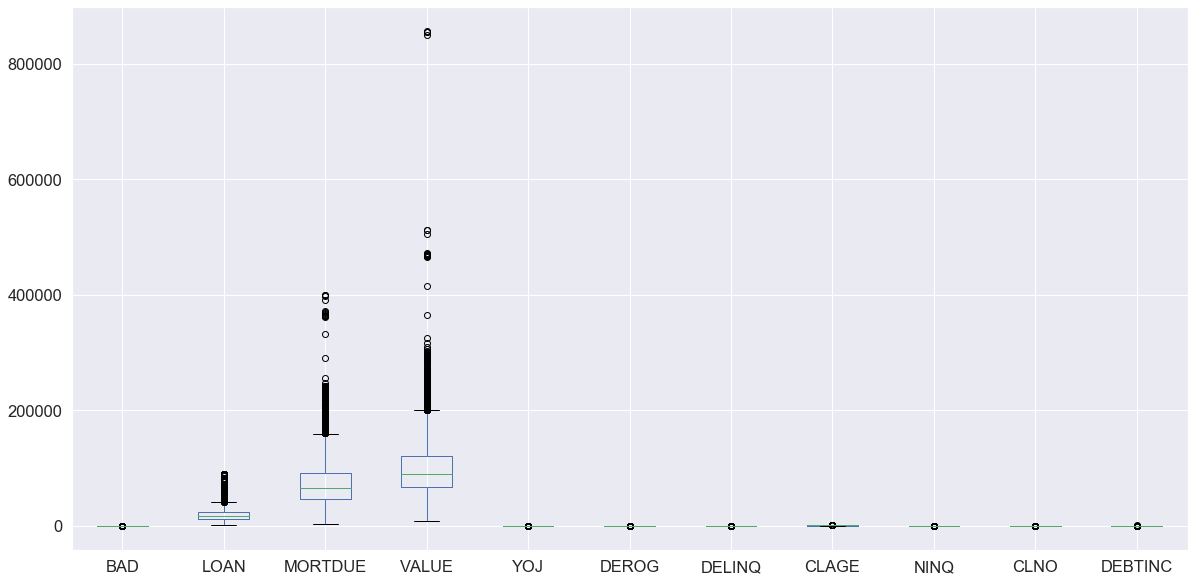

In [72]:
box = data.boxplot(figsize=(20,10))
#box.set_ylim(bottom = -10000);

In [73]:
#separating the features and the target variable
X=data.drop(['BAD'],axis=1)
Y=data['BAD']

# Data cleaning and encoding pipline

### 1/ Dropping missing values

In [74]:
#dropping NaN values
data_no_na = X.dropna()

In [75]:
#encoding categorical variables 
encode_reason = ce.OneHotEncoder(cols=['REASON'], return_df=True, use_cat_names=True)
encode_job = ce.OneHotEncoder(cols=['JOB'], return_df=True, use_cat_names=True)

In [76]:
# creating the encoding_pipeline
encoding_steps = [('encoding_reason', encode_reason),('encoding_job', encode_job)]
encoding_pipeline = Pipeline(encoding_steps)

In [77]:
# encoding categoriacal variables
data_clean_no_na = encoding_pipeline.fit_transform(data_no_na,Y).drop(columns = ["JOB_Other"])

In [78]:
data_clean_no_na.head(30)

,LOAN,MORTDUE,VALUE,REASON_HomeImp,REASON_DebtCon,JOB_Office,JOB_Mgr,JOB_ProfExe,JOB_Sales,JOB_Self,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1700,30548.0,40320.0,1,0,0,0,0,0,0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1800,28502.0,43034.0,1,0,0,0,0,0,0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,2300,102370.0,120953.0,1,0,1,0,0,0,0,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,2400,34863.0,47471.0,1,0,0,1,0,0,0,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,2400,98449.0,117195.0,1,0,1,0,0,0,0,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827
34,2900,103949.0,112505.0,1,0,1,0,0,0,0,1.0,0.0,0.0,96.102330,0.0,13.0,30.051136
35,2900,104373.0,120702.0,1,0,1,0,0,0,0,2.0,0.0,0.0,101.540298,0.0,13.0,29.915859
36,2900,7750.0,67996.0,1,0,0,0,0,0,0,16.0,3.0,0.0,122.204663,2.0,8.0,36.211348
37,2900,61962.0,70915.0,0,1,0,1,0,0,0,2.0,0.0,0.0,282.801659,3.0,37.0,49.206396
38,3000,104570.0,121729.0,1,0,1,0,0,0,0,2.0,0.0,0.0,85.884372,0.0,14.0,32.059783


In [79]:
# checking for any NaN values left
missing_values_table(data_clean_no_na)

Your selected dataframe has 17 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


#### 2/ Replacing missing Data with mean() and encoding categorical variables 


In [80]:
# X is a dataframe that has all the variables except the target variable

# list with numerical column names
data_num_columns_list = list(X.select_dtypes(exclude="object").columns) 

#list with categorical column names
data_cat_columns_list = list(X.select_dtypes(include = "object")) 

#list that contains all the values of the variable JOB
indexesJOB = X['JOB'].values

# list tha contains all the values of the variable REASON
indexesREASON = X['REASON'].values 

In [81]:
# Replace numerical NaN with mean
def replaceMean(df):
    for i in range (len(data_num_columns_list)):
        df[data_num_columns_list[i]].fillna(df[data_num_columns_list[i]].mean(), inplace=True)
    return df

In [82]:
# replace the NaN JOB with a random value
def replaceCatJOB(df):
    for i in df['JOB'][df['JOB'].isnull() == True].index:
        df['JOB'][i] = indexesJOB[np.random.randint(0, indexesJOB.size -1)]
    return df

In [83]:
# Replace the NaN REASON with random value
def replaceCatREASON(df):
    for i in df['REASON'][df['REASON'].isnull() == True].index:
        df['REASON'][i] = indexesREASON[np.random.randint(0, indexesREASON.size -1)]
    return df

In [84]:
# data_mean is the data frame the has mean() instead of NaN numericals and random values for NaN categoricals
replaceMean(X)
data_mean = replaceCatREASON(replaceCatJOB(X));

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [85]:
# checking for any missing values left
missing_values_table(data_mean)

Your selected dataframe has 12 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
REASON,6,0.1007
JOB,6,0.1007


In [86]:
# encoding categorical variables using the encoding pipeline
data_clean_mean = encoding_pipeline.fit_transform(data_mean,Y).drop(columns = ["JOB_Other"])
data_clean_mean.head(30)

,LOAN,MORTDUE,VALUE,REASON_HomeImp,REASON_DebtCon,REASON_nan,JOB_Office,JOB_Sales,JOB_Mgr,JOB_ProfExe,JOB_Self,JOB_nan,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1100,25860.0000,39025.000000,1,0,0,0,0,0,0,0,0,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1300,70053.0000,68400.000000,1,0,0,0,0,0,0,0,0,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1500,13500.0000,16700.000000,1,0,0,0,0,0,0,0,0,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1500,73760.8172,101776.048741,0,1,0,1,0,0,0,0,0,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,1700,97800.0000,112000.000000,1,0,0,1,0,0,0,0,0,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915
5,1700,30548.0000,40320.000000,1,0,0,0,0,0,0,0,0,9.000000,0.00000,0.000000,101.466002,1.000000,8.000000,37.113614
6,1800,48649.0000,57037.000000,1,0,0,0,0,0,0,0,0,5.000000,3.00000,2.000000,77.100000,1.000000,17.000000,33.779915
7,1800,28502.0000,43034.000000,1,0,0,0,0,0,0,0,0,11.000000,0.00000,0.000000,88.766030,0.000000,8.000000,36.884894
8,2000,32700.0000,46740.000000,1,0,0,0,0,0,0,0,0,3.000000,0.00000,2.000000,216.933333,1.000000,12.000000,33.779915
9,2000,73760.8172,62250.000000,1,0,0,0,1,0,0,0,0,16.000000,0.00000,0.000000,115.800000,0.000000,13.000000,33.779915


#### 3/Replacing missing data with median and encoding categorical variables

In [87]:
def replaceMedian(df):
    for i in range (len(data_num_columns_list)):
        df[data_num_columns_list[i]].fillna(df[data_num_columns_list[i]].median(), inplace=True)
    return df

In [88]:
# data_median is the data frame the has median() instead of NaN numericals and random values for NaN categoricals
replaceMean(X)
data_median = replaceCatREASON(replaceCatJOB(X));

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [89]:
# encoding categorical variables using the encoding pipeline
data_clean_median = encoding_pipeline.fit_transform(data_median,Y).drop(columns = ["JOB_Other"]) 
data_clean_median.head(30)

,LOAN,MORTDUE,VALUE,REASON_HomeImp,REASON_DebtCon,JOB_Office,JOB_Sales,JOB_Mgr,JOB_ProfExe,JOB_Self,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1100,25860.0000,39025.000000,1,0,0,0,0,0,0,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1300,70053.0000,68400.000000,1,0,0,0,0,0,0,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1500,13500.0000,16700.000000,1,0,0,0,0,0,0,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1500,73760.8172,101776.048741,0,1,1,0,0,0,0,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,1700,97800.0000,112000.000000,1,0,1,0,0,0,0,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915
5,1700,30548.0000,40320.000000,1,0,0,0,0,0,0,9.000000,0.00000,0.000000,101.466002,1.000000,8.000000,37.113614
6,1800,48649.0000,57037.000000,1,0,0,0,0,0,0,5.000000,3.00000,2.000000,77.100000,1.000000,17.000000,33.779915
7,1800,28502.0000,43034.000000,1,0,0,0,0,0,0,11.000000,0.00000,0.000000,88.766030,0.000000,8.000000,36.884894
8,2000,32700.0000,46740.000000,1,0,0,0,0,0,0,3.000000,0.00000,2.000000,216.933333,1.000000,12.000000,33.779915
9,2000,73760.8172,62250.000000,1,0,0,1,0,0,0,16.000000,0.00000,0.000000,115.800000,0.000000,13.000000,33.779915


In [90]:
# checking for any missing values left
missing_values_table(data_median)

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### After the cleaning we dispose of 3 diffrent dataframes :
* __data_clean_no_na__ : dropped all NaN values and encoded categorigal variables
* __data_clean_mean__ : replaced all numeriacal NaN with mean() and all categorical NaN with random values then encoded categorical variables
* __data_clean_median__ : replaced all numeriacal NaN with median() and all categorical NaN with random values then encoded categorical variables

# Data Scaling

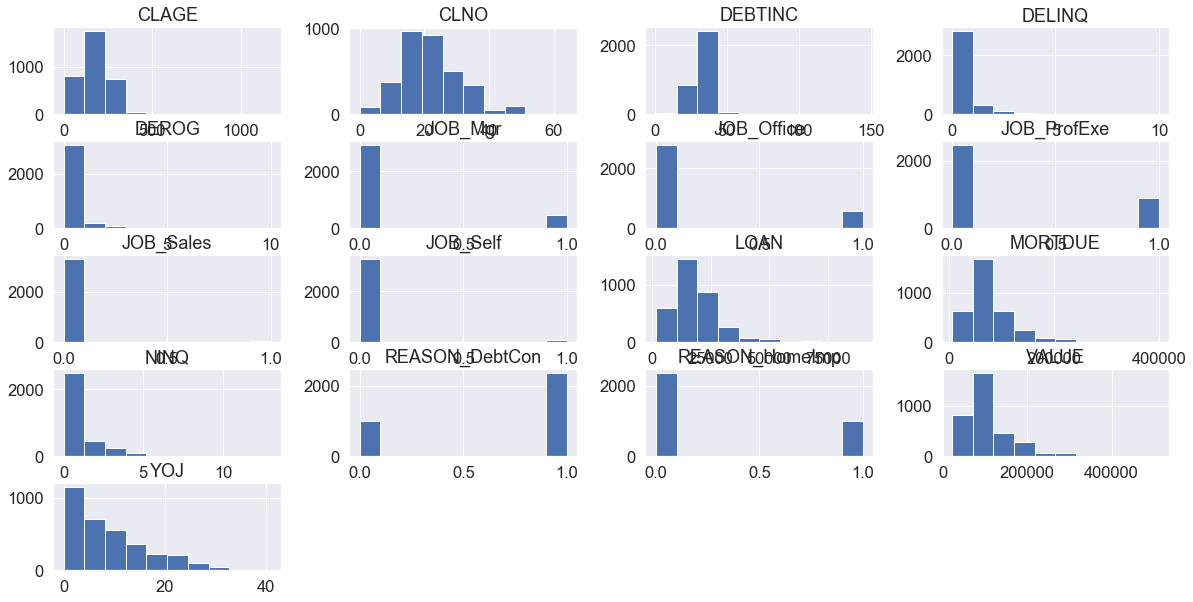

In [91]:
data_clean_no_na.hist(figsize=(20,10));

In [92]:
rs = RobustScaler()

In [93]:
matrice2 = rs.fit_transform(data_clean_no_na.values)

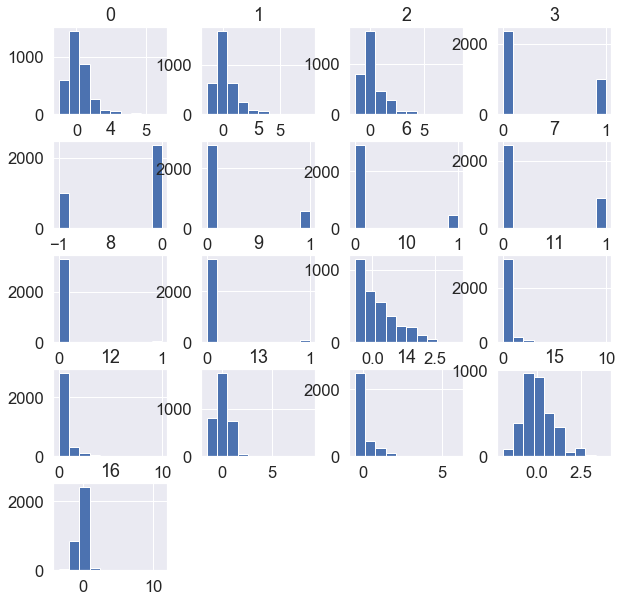

In [94]:
pd.DataFrame(matrice2).hist(figsize=(10,10));

In [95]:
pd.DataFrame(matrice2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.293869,-0.841757,-1.059276,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,-0.673826,0.0,-1.181818,0.204023
1,-1.285412,-0.888646,-1.006169,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,-0.787509,-0.5,-1.181818,0.180504
2,-1.243129,0.804196,0.518538,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,-0.767579,-0.5,-0.727273,-0.364110
3,-1.234672,-0.742870,-0.919346,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,0.0,-0.951096,0.0,0.000000,0.322273
4,-1.234672,0.714338,0.445002,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,-0.742343,-0.5,-0.727273,-0.560169
5,-1.192389,0.840382,0.353229,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,-0.6,0.0,0.0,-0.721839,-0.5,-0.727273,-0.522194
6,-1.192389,0.850099,0.513627,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,-0.673161,-0.5,-0.727273,-0.536104
7,-1.192389,-1.364222,-0.517716,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.9,3.0,0.0,-0.488186,0.5,-1.181818,0.111245
8,-1.192389,-0.121839,-0.460598,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.949383,1.0,1.454545,1.447493
9,-1.183932,0.854614,0.533723,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,-0.813304,-0.5,-0.636364,-0.315650


In [96]:
from sklearn.model_selection import train_test_split

In [97]:
data_clean_mean.head()

,LOAN,MORTDUE,VALUE,REASON_HomeImp,REASON_DebtCon,REASON_nan,JOB_Office,JOB_Sales,JOB_Mgr,JOB_ProfExe,JOB_Self,JOB_nan,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1100,25860.0000,39025.000000,1,0,0,0,0,0,0,0,0,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1300,70053.0000,68400.000000,1,0,0,0,0,0,0,0,0,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1500,13500.0000,16700.000000,1,0,0,0,0,0,0,0,0,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1500,73760.8172,101776.048741,0,1,0,1,0,0,0,0,0,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,1700,97800.0000,112000.000000,1,0,0,1,0,0,0,0,0,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915


In [117]:
X_train,X_test,y_train,y_test = train_test_split(data_clean_mean,Y,random_state=1)

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
def K_Nearest_Neighbors(Models_results,k):
    knn = KNeighborsClassifier(k)
    knn_model=knn.fit(X_train, y_train)
    y_pred_knn =knn_model.predict(X_test)
    print(knn_model,'\n')
    print(confusion_matrix(y_test, y_pred_knn))
    print(classification_report(y_test,y_pred_knn))
    roc=roc_auc_score(y_test, y_pred_knn)
    acc = accuracy_score(y_test,y_pred_knn)
    prec = precision_score(y_test, y_pred_knn)
    rec = recall_score(y_test,y_pred_knn)
    f1 = f1_score(y_test, y_pred_knn)
    model =  pd.DataFrame([['K Nearest Neighbors', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
    print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
    return M

Text(0, 0.5, 'Erreur')

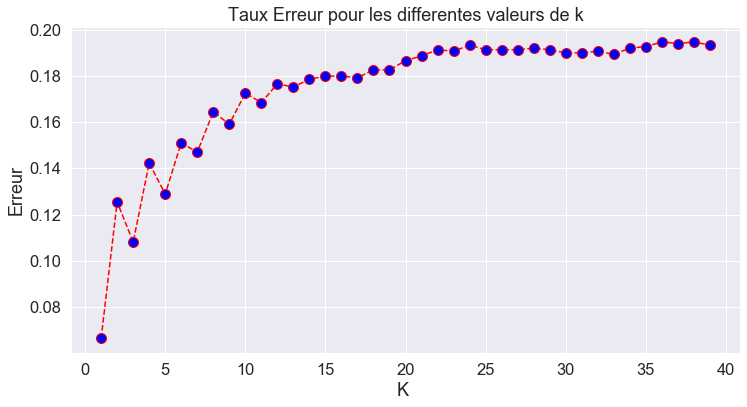

In [102]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [103]:
Models_results=pd.DataFrame()

In [104]:
Models_results=K_Nearest_Neighbors(Models_results,1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform') 

[[1166    5]
 [  94  225]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1171
           1       0.98      0.71      0.82       319

    accuracy                           0.93      1490
   macro avg       0.95      0.85      0.89      1490
weighted avg       0.94      0.93      0.93      1490

Accuracy of KNN classifier on training set: 1.00
Accuracy of KNN classifier on test set: 0.93


In [105]:
Models_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K Nearest Neighbors,0.933557,0.978261,0.705329,0.819672,0.85053


In [106]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [107]:
data_clean_mean.head()

,LOAN,MORTDUE,VALUE,REASON_HomeImp,REASON_DebtCon,REASON_nan,JOB_Office,JOB_Sales,JOB_Mgr,JOB_ProfExe,JOB_Self,JOB_nan,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1100,25860.0000,39025.000000,1,0,0,0,0,0,0,0,0,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1300,70053.0000,68400.000000,1,0,0,0,0,0,0,0,0,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1500,13500.0000,16700.000000,1,0,0,0,0,0,0,0,0,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1500,73760.8172,101776.048741,0,1,0,1,0,0,0,0,0,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,1700,97800.0000,112000.000000,1,0,0,1,0,0,0,0,0,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915


In [108]:
data_clean_mean.iloc[:,3:12].columns

Index(['REASON_HomeImp', 'REASON_DebtCon', 'REASON_nan', 'JOB_Office',
       'JOB_Sales', 'JOB_Mgr', 'JOB_ProfExe', 'JOB_Self', 'JOB_nan'],
      dtype='object')

In [109]:
X=data_clean_mean.drop(data_clean_mean.iloc[:,3:12].columns,axis=1)

In [110]:
X.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1100,25860.0000,39025.000000,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1300,70053.0000,68400.000000,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1500,13500.0000,16700.000000,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1500,73760.8172,101776.048741,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,1700,97800.0000,112000.000000,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915


In [111]:
Y

0       1
1       1
2       1
3       1
4       0
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      0
14      1
15      1
16      1
17      1
18      1
19      0
20      1
21      1
22      1
23      1
24      1
25      1
26      0
27      1
28      1
29      0
       ..
5930    1
5931    1
5932    1
5933    1
5934    1
5935    0
5936    0
5937    0
5938    0
5939    0
5940    0
5941    0
5942    0
5943    0
5944    0
5945    0
5946    0
5947    0
5948    0
5949    0
5950    0
5951    0
5952    0
5953    0
5954    0
5955    0
5956    0
5957    0
5958    0
5959    0
Name: BAD, Length: 5960, dtype: int64

In [121]:
X_train,X_test,y_train,y_test = train_test_split(data_clean_median,Y,random_state = 1)

In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Text(0, 0.5, 'Erreur')

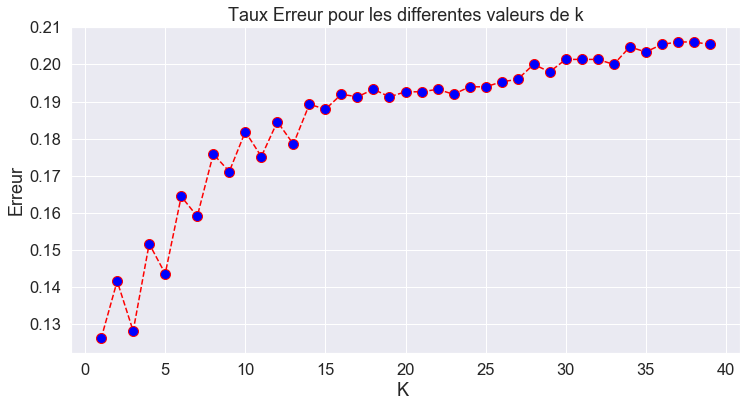

In [114]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [123]:
Models_results=K_Nearest_Neighbors(Models_results,1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform') 

[[1166    5]
 [  93  226]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1171
           1       0.98      0.71      0.82       319

    accuracy                           0.93      1490
   macro avg       0.95      0.85      0.89      1490
weighted avg       0.94      0.93      0.93      1490

Accuracy of KNN classifier on training set: 1.00
Accuracy of KNN classifier on test set: 0.93


In [124]:
Models_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K Nearest Neighbors,0.933557,0.978261,0.705329,0.819672,0.850530
1,K Nearest Neighbors,0.873826,0.723549,0.664577,0.692810,0.797703
2,K Nearest Neighbors,0.934228,0.978355,0.708464,0.821818,0.852097


In [119]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [120]:
est = GradientBoostingClassifier()
gb_p_dist={'n_estimators':[100,250,500,750],
           'max_depth':[3,5,10,None],
           'min_samples_leaf':randint(1,10),
           }

NameError: name 'randint' is not defined